In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading and Exploring the data

In [9]:
# Import the dataset
df = pd.read_csv("../data/MachineLearningRating_v3.txt", sep="|")

# Display the first few rows of the dataset
df.head(5)

df.info()

df.describe()

/tmp/ipykernel_238020/1788163924.py:2: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/MachineLearningRating_v3.txt", sep="|")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

,UnderwrittenCoverID,PolicyID,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,CustomValueEstimate,NumberOfVehiclesInFleet,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims
count,1.000098e+06,1.000098e+06,1.000098e+06,9.995460e+05,1.000098e+06,999546.000000,999546.000000,999546.000000,999546.000000,2.204560e+05,0.0,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06
mean,1.048175e+05,7.956682e+03,3.020601e+03,5.487770e+07,2.010225e+03,4.046642,2466.743258,97.207919,4.019250,2.255311e+05,NaN,6.041727e+05,1.178757e+02,6.190550e+01,6.486119e+01
std,6.329371e+04,5.290039e+03,2.649854e+03,1.360381e+07,3.261391e+00,0.294020,442.800640,19.393256,0.468314,5.645157e+05,NaN,1.508332e+06,3.997017e+02,2.302845e+02,2.384075e+03
min,1.000000e+00,1.400000e+01,1.000000e+00,4.041200e+06,1.987000e+03,0.000000,0.000000,0.000000,0.000000,2.000000e+04,NaN,1.000000e-02,0.000000e+00,-7.825768e+02,-1.200241e+04
25%,5.514300e+04,4.500000e+03,8.270000e+02,6.005692e+07,2.008000e+03,4.000000,2237.000000,75.000000,4.000000,1.350000e+05,NaN,5.000000e+03,3.224800e+00,0.000000e+00,0.000000e+00
50%,9.408300e+04,7.071000e+03,2.000000e+03,6.005842e+07,2.011000e+03,4.000000,2694.000000,111.000000,4.000000,2.200000e+05,NaN,7.500000e+03,8.436900e+00,2.178333e+00,0.000000e+00
75%,1.391900e+05,1.107700e+04,4.180000e+03,6.005842e+07,2.013000e+03,4.000000,2694.000000,111.000000,4.000000,2.800000e+05,NaN,2.500000e+05,9.000000e+01,2.192982e+01,0.000000e+00
max,3.011750e+05,2.324600e+04,9.870000e+03,6.506535e+07,2.015000e+03,10.000000,12880.000000,309.000000,6.000000,2.655000e+07,NaN,1.263620e+07,7.442217e+04,6.528260e+04,3.930921e+05


### Data cleaning and preparation

In [10]:
# Check for missing values
missing_data = df.isnull().sum()
print("Missing Values:\n", missing_data[missing_data > 0])

# Convert date fields if needed
df["TransactionMonth"] = pd.to_datetime(df["TransactionMonth"], errors="coerce")

Missing Values:
 Bank                        145961
AccountType                  40232
MaritalStatus                 8259
Gender                        9536
mmcode                         552
VehicleType                    552
make                           552
Model                          552
Cylinders                      552
cubiccapacity                  552
kilowatts                      552
bodytype                       552
NumberOfDoors                  552
VehicleIntroDate               552
CustomValueEstimate         779642
CapitalOutstanding               2
NewVehicle                  153295
WrittenOff                  641901
Rebuilt                     641901
Converted                   641901
CrossBorder                 999400
NumberOfVehiclesInFleet    1000098
dtype: int64


### Univariate Analysis

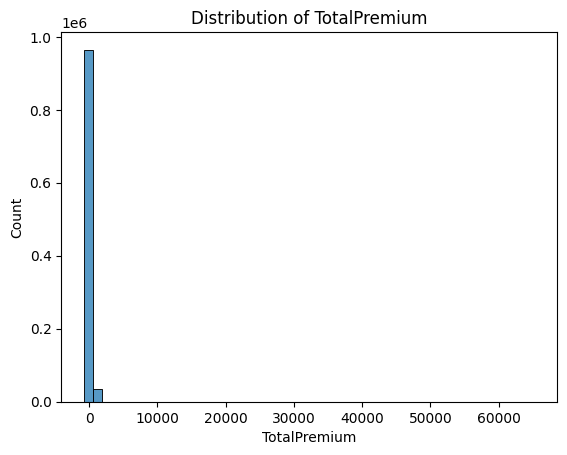

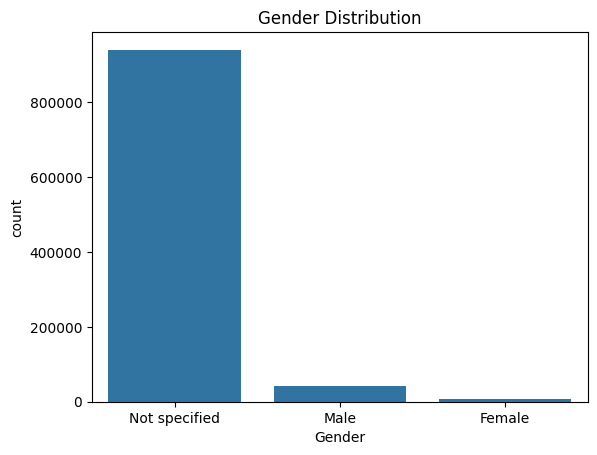

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histogram of TotalPremium
sns.histplot(df["TotalPremium"], bins=50)
plt.title("Distribution of TotalPremium")
plt.show()

# Plot bar chart for Gender
sns.countplot(x="Gender", data=df)
plt.title("Gender Distribution")
plt.show()

### Bivariate/Multivariate Analysis

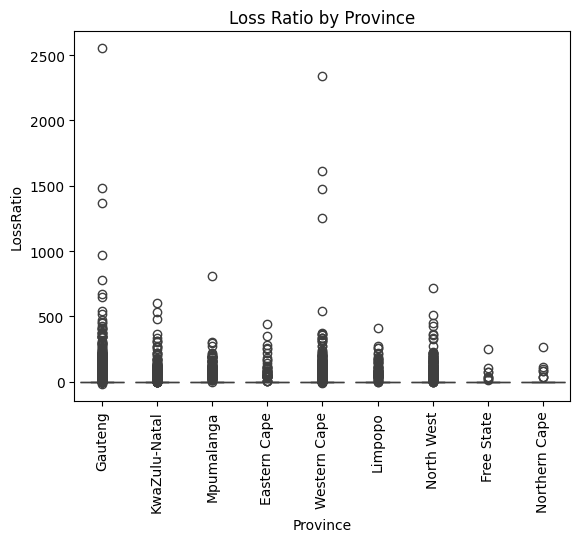

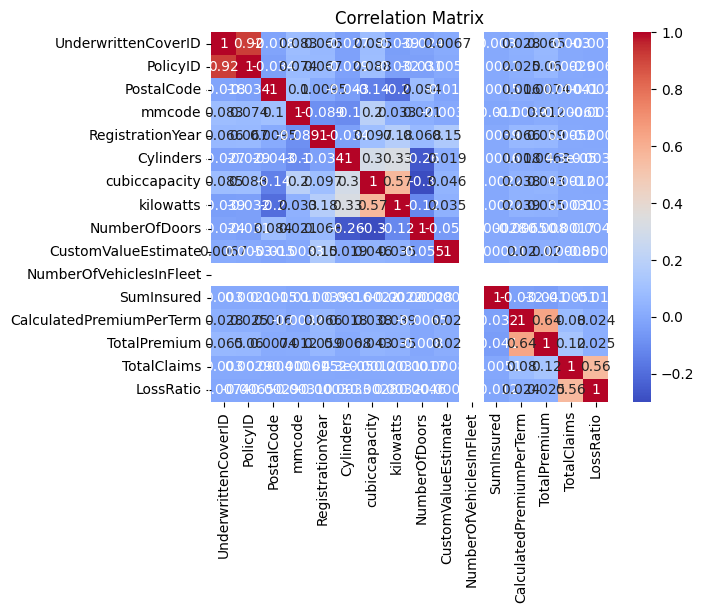

In [12]:
# Loss Ratio
df["LossRatio"] = df["TotalClaims"] / df["TotalPremium"]

# Compare Loss Ratio by Province
sns.boxplot(x="Province", y="LossRatio", data=df)
plt.xticks(rotation=90)
plt.title("Loss Ratio by Province")
plt.show()

# Correlation heatmap
numerical = df.select_dtypes(include="number")
sns.heatmap(numerical.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

### Outlier Detection

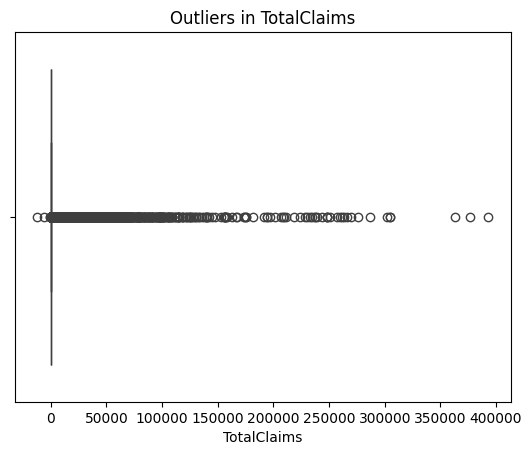

In [13]:
# Boxplot for TotalClaims
sns.boxplot(x=df["TotalClaims"])
plt.title("Outliers in TotalClaims")
plt.show()

### Visualizations

#### 1. Loss Ratio By Province

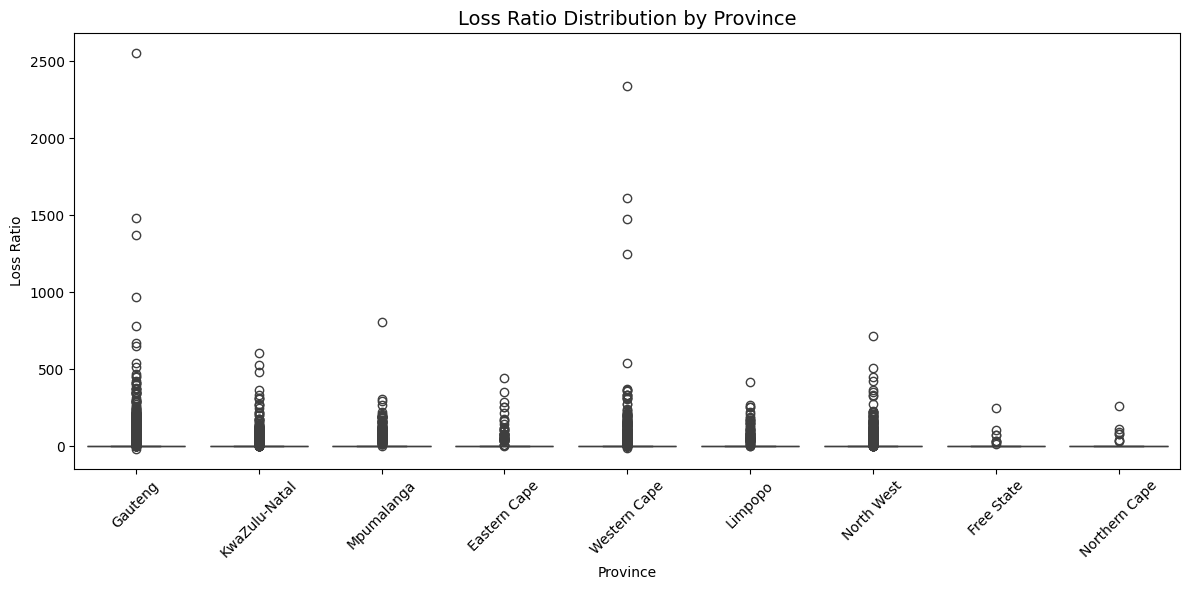

In [14]:
# Compute Loss Ratio
df["LossRatio"] = df["TotalClaims"] / df["TotalPremium"]

# Plot
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="Province", y="LossRatio")
plt.xticks(rotation=45)
plt.title("Loss Ratio Distribution by Province", fontsize=14)
plt.ylabel("Loss Ratio")
plt.xlabel("Province")
plt.tight_layout()
plt.show()

#### 2. Total Claims by Vehicle Make (Top 10)

/tmp/ipykernel_238020/907755262.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_makes.values, y=top_makes.index, palette="magma")


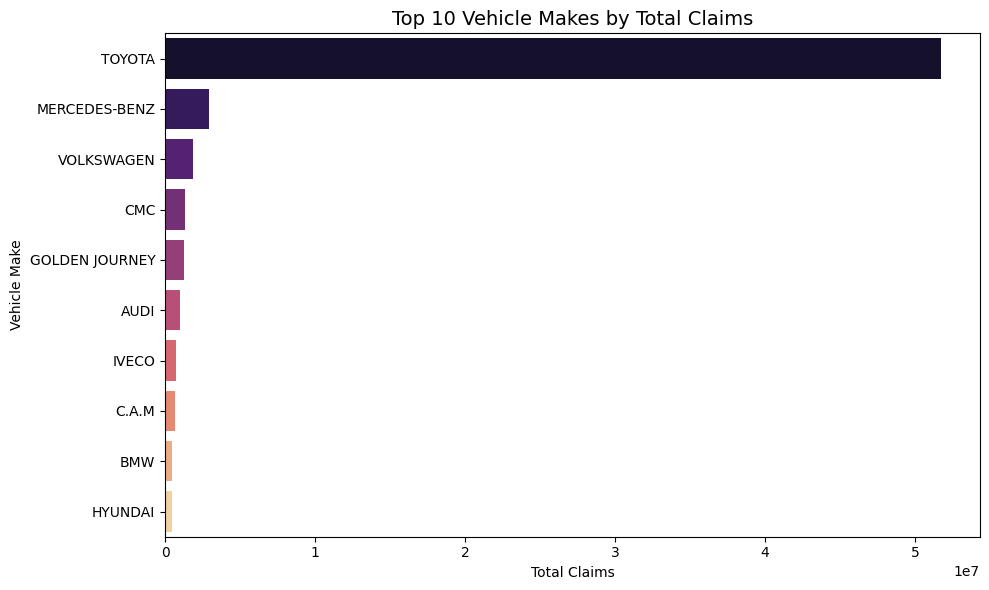

In [16]:
# Group and sort by claims
top_makes = df.groupby("make")["TotalClaims"].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_makes.values, y=top_makes.index, palette="magma")
plt.title("Top 10 Vehicle Makes by Total Claims", fontsize=14)
plt.xlabel("Total Claims")
plt.ylabel("Vehicle Make")
plt.tight_layout()
plt.show()

#### 3. Loss Ratio by Gender

/tmp/ipykernel_238020/799550219.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Gender", y="LossRatio", palette="Set2")


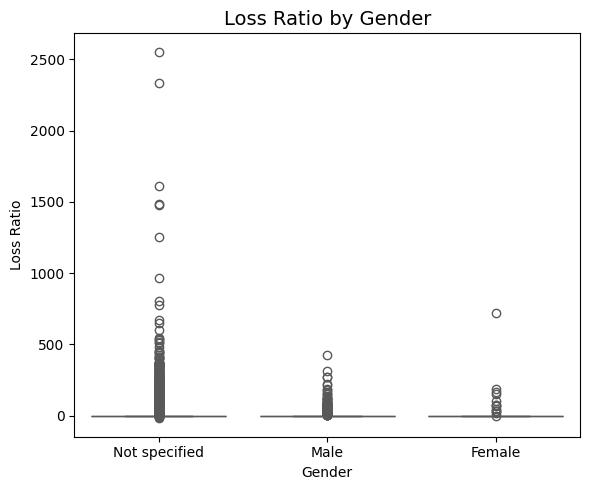

In [17]:
plt.figure(figsize=(6,5))
sns.boxplot(data=df, x="Gender", y="LossRatio", palette="Set2")
plt.title("Loss Ratio by Gender", fontsize=14)
plt.xlabel("Gender")
plt.ylabel("Loss Ratio")
plt.tight_layout()
plt.show()